# Heart Disease Analysis
<p>We will be using the heart disease data set from the UCI Machine Learning Repository. After initial viewing of the data, we will clean it and handle missing values. We will then run some basic statistical tests and visualizations to decide what machine learning models to use. From there we will then implement classification trees, random forest, and logistic regression models.</p>

<p>The UCI page linked below mentions that the original data has 76 variable, but all published versions only use 14 predictors. The included variables with their description and data type are as follows:

|   Name   	|                                                             Description                                                            	|  Data Type  	|
|:--------:	|:----------------------------------------------------------------------------------------------------------------------------------:	|:-----------:	|
|    age   	|                                                             age in year                                                            	|  continuous 	|
|    sex   	|                                                      sex(1 = male; 0 = female)                                                     	| categorical 	|
|    cp    	|                  chest pain type (1 = typical angina; 2 = atypical angina;  3 = non-anginal pain; 4 = asymptomatic)                  	| categorical 	|
| trestbps 	|                                                  resting blood pressure (in mm/Hg)                                                 	|  continuous 	|
|   chol   	|                                                     serum cholestoral in mg/dl                                                     	|  continuous 	|
|    fbs   	|                                        fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                       	| categorical 	|
|  restecg 	| resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = showing probable left ventricular hypertrophy) 	| categorical 	|
|  thalach 	|                                                     maximum heart rate achieved                                                    	|  continuous 	|
|   exang  	|                                               exercise induced angina (1 = yes; 0 = no)                                               	| categorical 	|
|  oldpeak 	|                                         ST depression induced by exercise relative to rest                                         	|  continous  	|
|   slope  	|                            the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)                           	| categorical 	|
|    ca    	|                                         number of major vessels(0-3) colored by flourosopy                                         	| categorical 	|
|   thal   	|                               Thalessemia category (3 = normal; 6 = fixed defect; 7 = reversible defect)                               	| categorical 	|
|   class  	|   diagnosis class of heart disease (0 = no presence; 1 = least likely; 2 = more likely than 1; 3 = more likely than 2; 4 = most likely)  	| categorical 	|



https://archive.ics.uci.edu/ml/datasets/heart+Disease 

<p>Most of these descriptions can be understood by those outside the medical field, but a few require more explanation.</p>

<p><b>Angina</b>: a description of chest pain that is caused by a reduced blood flow.</p>

<p><b>ST-T wave abnormality</b>: a type of ECG wave that can be influenced by the presence of unfavorable circumstances like hypoglycemia, hemorrhage, and ventrical problems</p>

<p><b>ST depression:</b> another finding from an ECG with similar negative causes.</p>

<p><b>Flourosopy:</b> a medical procedure used to diagnose disease. It uses an X-Ray to "color" parts of the body so that they can be seen in higher contrast.</p>

<p><b>Thalessemia:</b> an inherited blood disorder characterized by less hemoglobin and fewer red blood cells than normal.</p>

## Reading and processing the data

In [2]:
library(dplyr)
options(warn = -1)
data <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header = FALSE)
head(data)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


We will now add the variable names and alter some so they can be read better

In [3]:
var_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restECG", "Max_HR", "exang", "oldpeak", "slope", "vessels", "thal", "class")

colnames(data) <- var_names
head(data)

age,sex,cp,trestbps,chol,fbs,restECG,Max_HR,exang,oldpeak,slope,vessels,thal,class
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


When we take a look at the structure of that data, we see that most of it is not in the correct type

In [4]:
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : num  1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : num  1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : num  1 0 0 0 0 0 0 0 0 1 ...
 $ restECG : num  2 2 2 0 2 0 2 0 2 2 ...
 $ Max_HR  : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : num  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : num  3 2 2 3 1 1 3 1 2 3 ...
 $ vessels : Factor w/ 5 levels "?","0.0","1.0",..: 2 5 4 2 2 2 4 2 3 2 ...
 $ thal    : Factor w/ 4 levels "?","3.0","6.0",..: 3 2 4 2 2 2 2 2 4 4 ...
 $ class   : int  0 2 1 0 0 0 3 0 2 1 ...


Only vessels and thal are factors so we need to also change sex, cp, fbs, restECG, exang, slope, and class to categories. We will also create a new binary variable that will indicate a yes(1)/no(0) presence of heart disease. Since the original class variable ranges from 0-4, we will choose to make anything above 0 an indication of possible heart disease. This is arguably a strict boundary since a category of 1 in the class variable only indicates a "least likely", but for the severity of this issue, a strict boundary seems appropriate.

In [5]:
data %>% mutate(hd = ifelse(class > 0, 1, 0)) -> hd_data

hd_data %>% mutate(hd = factor(hd, levels = c(0,1), labels = c(0,1))) -> hd_data

hd_data %>% mutate(sex = factor(sex, levels = c(0,1), labels = c("Female", "Male"))) -> hd_data

hd_data %>% mutate(cp = factor(cp, levels = c(1,2,3,4), labels = c(1,2,3,4))) -> hd_data

hd_data %>% mutate(fbs = factor(fbs, levels = c(0,1), labels = c(0,1))) -> hd_data

hd_data %>% mutate(restECG = factor(restECG, levels = c(0,1,2), labels = c(0,1,2))) -> hd_data

hd_data %>% mutate(exang = factor(exang, levels = c(0,1), labels = c(0,1))) -> hd_data

hd_data %>% mutate(slope = factor(slope, levels = c(1,2,3), labels = c(1,2,3))) -> hd_data

hd_data %>% mutate(class = factor(class, levels = c(0,1,2,3,4), labels = c(0,1,2,3,4))) -> hd_data

In [6]:
str(hd_data)

'data.frame':	303 obs. of  15 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 2 1 1 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restECG : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ Max_HR  : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ vessels : Factor w/ 5 levels "?","0.0","1.0",..: 2 5 4 2 2 2 4 2 3 2 ...
 $ thal    : Factor w/ 4 levels "?","3.0","6.0",..: 3 2 4 2 2 2 2 2 4 4 ...
 $ class   : Factor w/ 5 levels "0","1","2","3",..: 1 3 2 1 1 1 4 1 3 2 ...
 $ hd      : Fact

Now the appropriate variables match their class. The view of the structure also points out that both vessels and thal have missing values.

## Handling missing values

Lets first deal with the vessels predictor

In [7]:
missing <- which(hd_data$vessels == "?") ## rows 167, 193, 288, 303

hd_data[missing,]



,age,sex,cp,trestbps,chol,fbs,restECG,Max_HR,exang,oldpeak,slope,vessels,thal,class,hd
167,52,Male,3,138,223,0,0,169,0,0.0,1,?,3.0,0,0
193,43,Male,4,132,247,1,2,143,1,0.1,2,?,7.0,1,1
288,58,Male,2,125,220,0,0,144,0,0.4,2,?,7.0,0,0
303,38,Male,3,138,175,0,0,173,0,0.0,1,?,3.0,0,0


We will use dplyr's summarise function to count the values of each type of vessels factors

In [8]:
hd_data %>% group_by(vessels) %>% summarise(no_rows = length(vessels))

vessels,no_rows
?,4
0.0,176
1.0,65
2.0,38
3.0,20


This confirms there are only 4 missing values and shows that 0.0 is the most common. We will use this value for our imputation.

In [9]:
hd_dataimp <- hd_data

##Must convert using this method
hd_dataimp$vessels <- as.numeric(as.character(hd_dataimp$vessels))

hd_dataimp[missing,]$vessels <- as.numeric(0.0)

hd_dataimp$vessels <- as.factor(hd_dataimp$vessels)
hd_dataimp %>% group_by(vessels) %>% summarise(no_rows = length(vessels))

vessels,no_rows
0,180
1,65
2,38
3,20


Now we will tackle the thal variable

In [10]:
missing_thal <- which(hd_dataimp$thal == "?")
hd_dataimp[missing_thal,]

,age,sex,cp,trestbps,chol,fbs,restECG,Max_HR,exang,oldpeak,slope,vessels,thal,class,hd
88,53,Female,3,128,216,0,2,115,0,0,1,0,?,0,0
267,52,Male,4,128,204,1,0,156,1,1,2,0,?,2,1


In [11]:
hd_dataimp %>% group_by(thal) %>% summarise(no_rows = length(thal))

thal,no_rows
?,2
3.0,166
6.0,18
7.0,117


This one is more tricky. There are high amounts of 3 and 7. For review 3 in the thal variable means the patient is normal. A 7 indicated that there was a reversible defect. Neither of these seem more indicative of heart disease so we will choose a value of 3 for the two rows.

In [12]:
hd_dataimp1 <- hd_dataimp

hd_dataimp1$thal <- as.numeric(as.character(hd_dataimp1$thal))
hd_dataimp1[missing_thal,]$thal <- as.numeric(3.0)

hd_dataimp1$thal <- as.factor(hd_dataimp1$thal)

str(hd_dataimp1)

'data.frame':	303 obs. of  15 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 2 1 1 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restECG : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ Max_HR  : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ vessels : Factor w/ 4 levels "0","1","2","3": 1 4 3 1 1 1 3 1 2 1 ...
 $ thal    : Factor w/ 3 levels "3","6","7": 2 1 3 1 1 1 1 1 3 3 ...
 $ class   : Factor w/ 5 levels "0","1","2","3",..: 1 3 2 1 1 1 4 1 3 2 ...
 $ hd      : Factor w/ 2 le

The structure view shows that there are no more missing values for this set.

## Statistical exploration

We will now use basic t-tests and chi-squared tests to explore the relationship between some of the variables and heart disease.

In [13]:
hd_sex <- chisq.test(x = hd_dataimp1$sex, y = hd_dataimp1$hd)


hd_age <- t.test(hd_dataimp1$age ~ hd_dataimp1$hd)

hd_heartrate <- t.test(hd_dataimp1$Max_HR ~ hd_dataimp1$hd)
 
hd_oldpeak <- t.test(hd_dataimp1$oldpeak ~ hd_dataimp1$hd)

print(hd_sex)
print(hd_age)
print(hd_heartrate)
print(hd_oldpeak)


	Pearson's Chi-squared test with Yates' continuity correction

data:  hd_dataimp1$sex and hd_dataimp1$hd
X-squared = 22.043, df = 1, p-value = 2.667e-06


	Welch Two Sample t-test

data:  hd_dataimp1$age by hd_dataimp1$hd
t = -4.0303, df = 300.93, p-value = 7.061e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.013385 -2.067682
sample estimates:
mean in group 0 mean in group 1 
       52.58537        56.62590 


	Welch Two Sample t-test

data:  hd_dataimp1$Max_HR by hd_dataimp1$hd
t = 7.8579, df = 272.27, p-value = 9.106e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 14.32900 23.90912
sample estimates:
mean in group 0 mean in group 1 
        158.378         139.259 


	Welch Two Sample t-test

data:  hd_dataimp1$oldpeak by hd_dataimp1$hd
t = -7.8234, df = 217.92, p-value = 2.195e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence 

We see that the p-value for all of these is well below 0.05.

## Visual Exploration

Now we will use ggplot2 to create visualizations of these relationships. This will allow us to visually see what factors should be included in a model for predicting heart disease. We will use most of the multi-factor categorical variables with bar charts. We will also create a new variable called <code>hd_labelled</code> for easier labelling.  

The following boxplot was used for the continuous variable <code>age</code> which found that the average age of those with heart disease was relatively higher than those without.

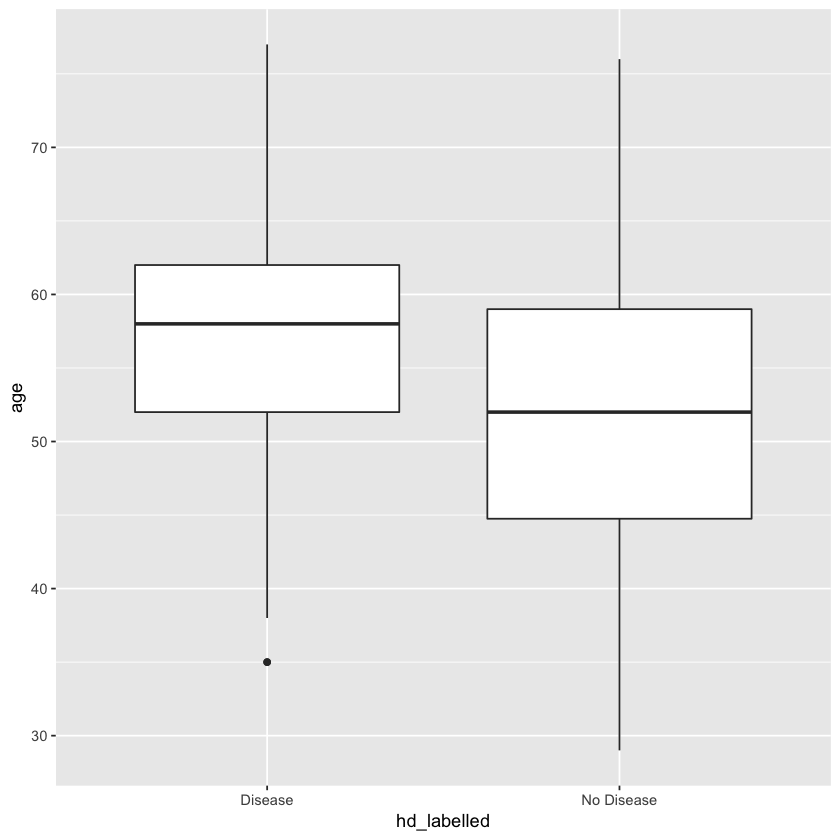

In [14]:
library(ggplot2)
hd_dataimp1%>% mutate(hd_labelled = ifelse(hd == 0, "No Disease", "Disease")) -> hd_dataimp1

# age vs hd
ggplot(data = hd_dataimp1, aes(x = hd_labelled,y = age)) + geom_boxplot()

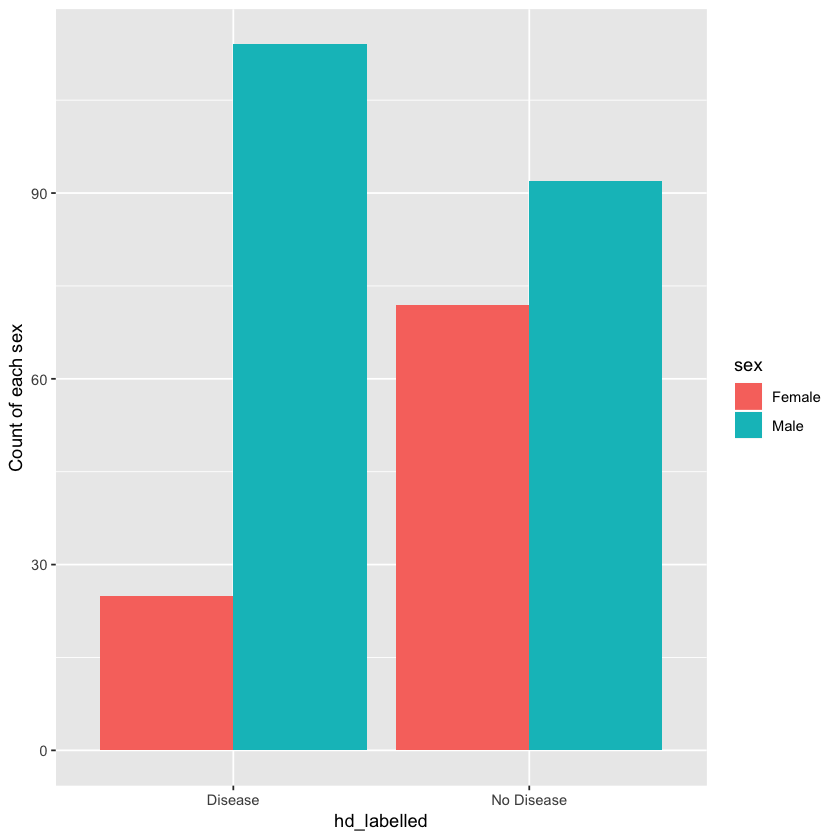

In [15]:
ggplot(data = hd_dataimp1, aes(x = hd_labelled, fill = sex)) + geom_bar(position = "dodge") + ylab("Count of each sex")



This graph shows a disproportionate amount of males having heart disease compared to females. It is important to remember that there are about 193 males and 97 females, so a graph like the one below shows a slightly better representation of the two sets.

If we change the graph style to show the percentage, we see that males still seem to be at higher risk for heart disease.

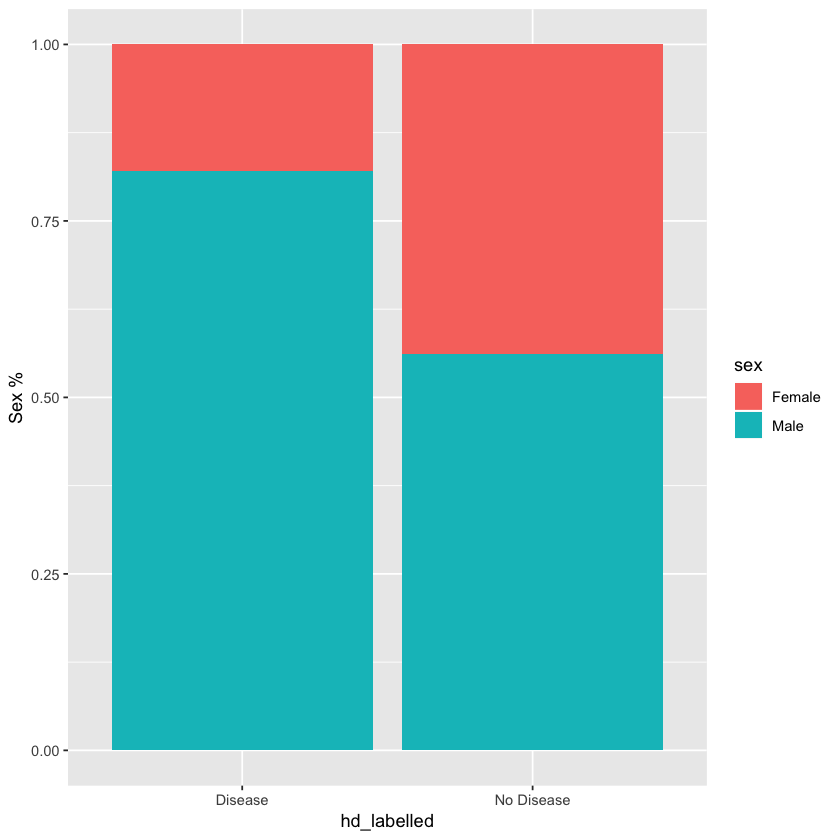

In [16]:
ggplot(data = hd_dataimp1, aes(x = hd_labelled, fill = sex)) + geom_bar(position = "fill") + ylab("Sex %")

The next graph separates heart disease classification by amount and type of chest pain. We see that <code>cp = 4</code>, asymptomatic chest pain, is highly associated with heart disease compared to other types.

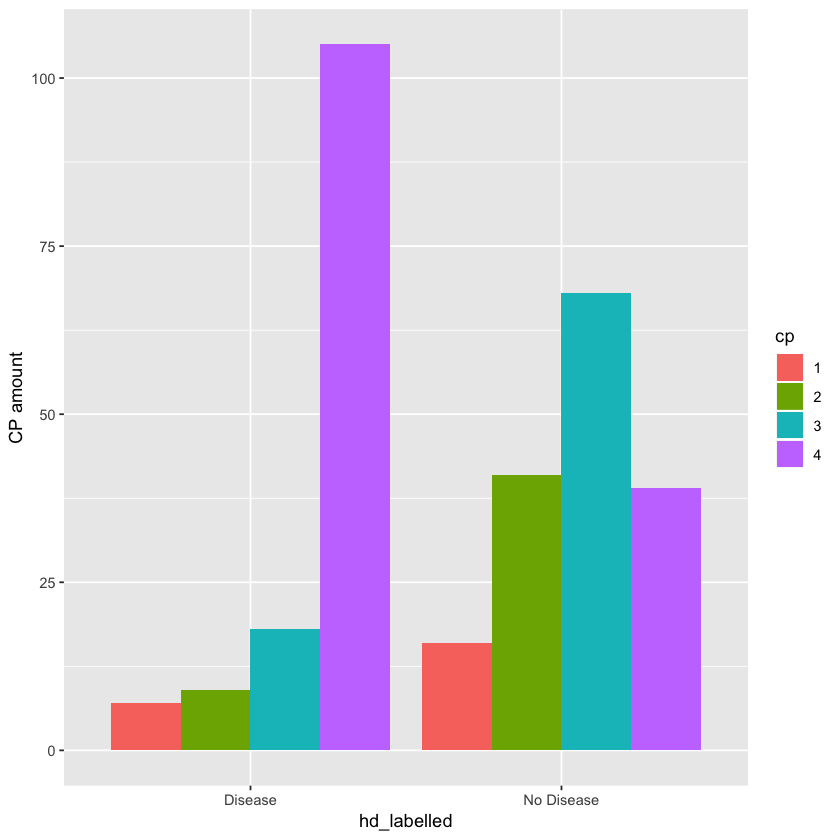

In [17]:
ggplot(data = hd_dataimp1, aes(x = hd_labelled, fill = cp)) + geom_bar(position = "dodge") + ylab("CP amount")




 Visually, the plots for fasting blood sugar do not show useful information.

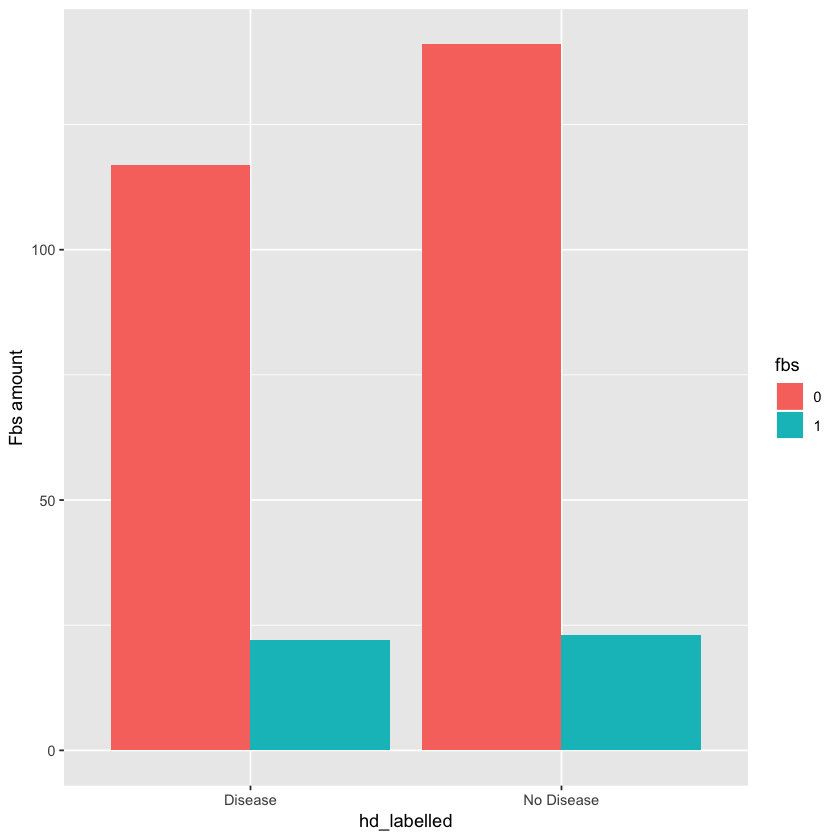

In [18]:
ggplot(data = hd_dataimp1, aes(x = hd_labelled, fill = fbs)) + geom_bar(position = "dodge") + ylab("Fbs amount")



For exercise induced angina, the plots below seem to suggest that those who experience it, <code>exang=1</code> are more likely to be at risk for heart disease. There also seems to be a much larger proportion of <code>exang=0</code> in the <code>No Disease</code> category

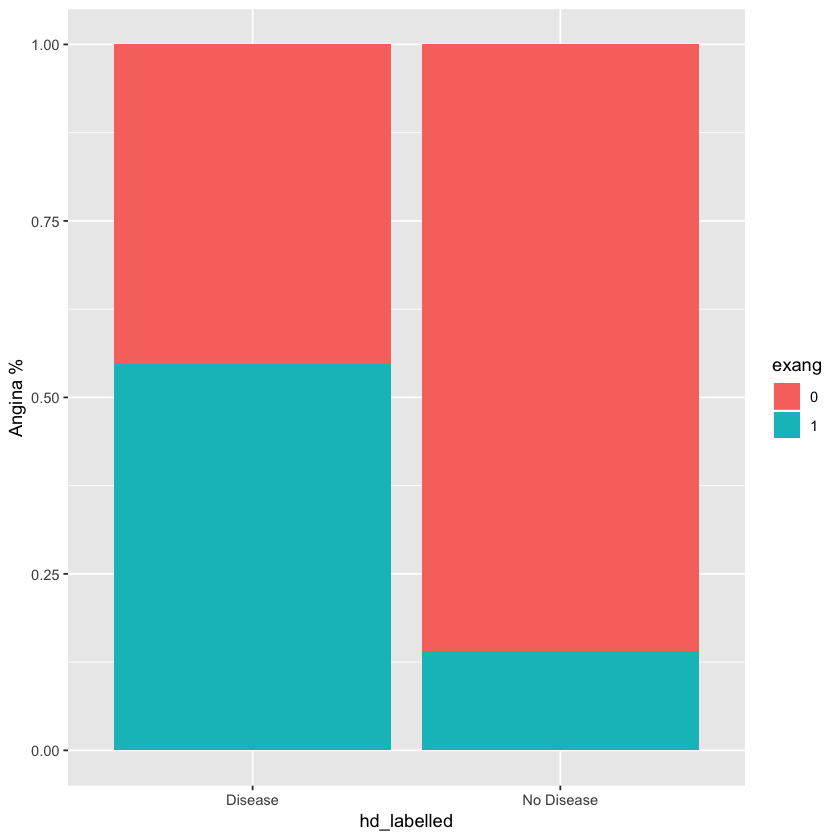

In [22]:
ggplot(data = hd_dataimp1, aes(x = hd_labelled, fill = exang)) + geom_bar(position = "fill") + ylab("Angina %")



We can assume that those with a reversible defect of thalessemia are more likely to contract heart disease, where as those with a normal classification will not be as at risk.

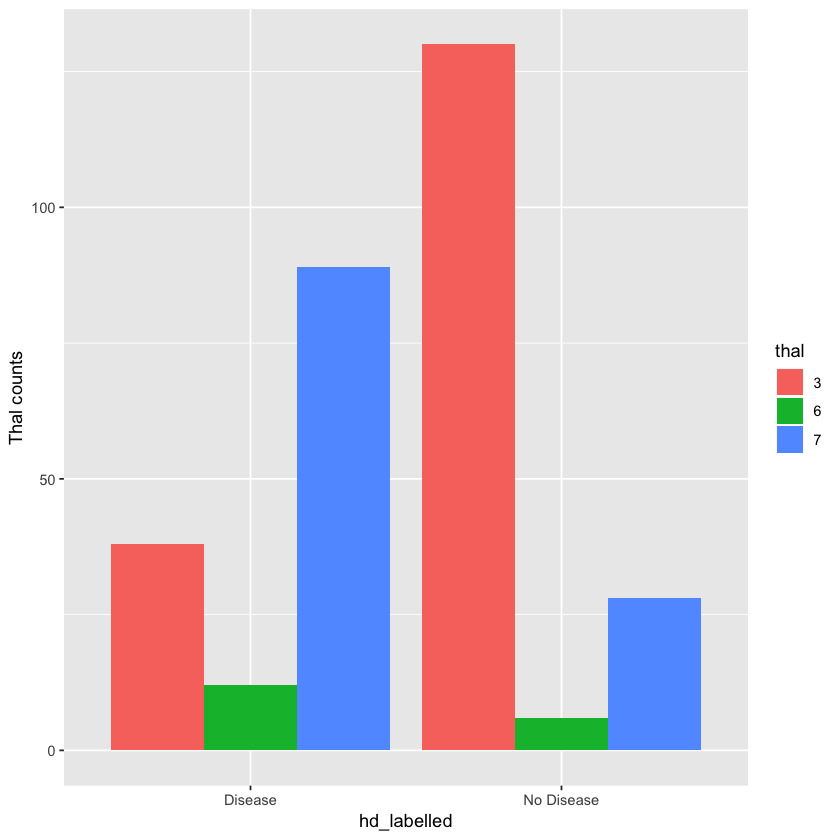

In [20]:
ggplot(data = hd_dataimp1, aes(x = hd_labelled, fill = thal)) + geom_bar(position = "dodge") + ylab("Thal counts")
#reversible defect seems to be associated

## Building Tree-Based Models

In [24]:
install.packages("tree")


The downloaded binary packages are in
	/var/folders/7f/hbrbbjzn7dxgmh0qr5vwhbnr0000gn/T//Rtmp9qh8g7/downloaded_packages


In [27]:
head(hd_dataimp1)

age,sex,cp,trestbps,chol,fbs,restECG,Max_HR,exang,oldpeak,slope,vessels,thal,class,hd,hd_labelled
63,Male,1,145,233,1,2,150,0,2.3,3,0,6,0,0,No Disease
67,Male,4,160,286,0,2,108,1,1.5,2,3,3,2,1,Disease
67,Male,4,120,229,0,2,129,1,2.6,2,2,7,1,1,Disease
37,Male,3,130,250,0,0,187,0,3.5,3,0,3,0,0,No Disease
41,Female,2,130,204,0,2,172,0,1.4,1,0,3,0,0,No Disease
56,Male,2,120,236,0,0,178,0,0.8,1,0,3,0,0,No Disease


In [25]:
library(tree)
library(randomForest)
library(e1071)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



Using our <code>hd_dataimp1</code> dataset with the <code>class</code> and <code>hd_labelled</code> factors removed for their relation to the desired predictor <code>hd</code>, we build a basic classification tree.

In [26]:
tree.data <- tree(hd~., data = hd_dataimp1[,c(-14,-16)])
summary(tree.data)


Classification tree:
tree(formula = hd ~ ., data = hd_dataimp1[, c(-14, -16)])
Variables actually used in tree construction:
[1] "thal"     "cp"       "age"      "vessels"  "trestbps" "Max_HR"   "chol"    
[8] "restECG"  "oldpeak" 
Number of terminal nodes:  16 
Residual mean deviance:  0.606 = 173.9 / 287 
Misclassification error rate: 0.1287 = 39 / 303 

9 predictors of the included 13 were used. <code>fbs, sex, exang, slope</code> were not included in this tree. From our above visualization, <code>fbs</code> not being included is not surprising, however both <code>sex</code> and <code>exang</code> seemed to show some relation.

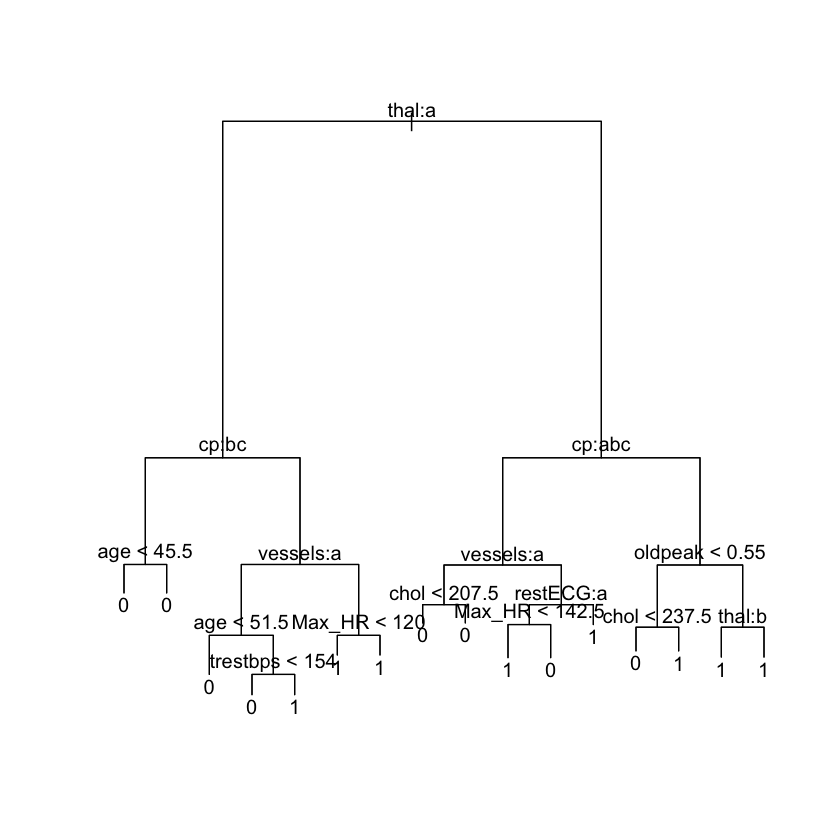

In [32]:
plot(tree.data)
text(tree.data)

This tree is not very easy to read, so we will try a different package, <code>rpart</code> for visualization

In [33]:
install.packages("rpart")
install.packages("rpart.plot")


The downloaded binary packages are in
	/var/folders/7f/hbrbbjzn7dxgmh0qr5vwhbnr0000gn/T//Rtmp9qh8g7/downloaded_packages

The downloaded binary packages are in
	/var/folders/7f/hbrbbjzn7dxgmh0qr5vwhbnr0000gn/T//Rtmp9qh8g7/downloaded_packages


In [34]:
library(rpart)
library(rpart.plot)

In [35]:
tree.data1 <- rpart(hd~., data = hd_dataimp1[,c(-14,-16)], method = "class")

In [38]:
summary(tree.data1)

Call:
rpart(formula = hd ~ ., data = hd_dataimp1[, c(-14, -16)], method = "class")
  n= 303 

          CP nsplit rel error    xerror       xstd
1 0.48201439      0 1.0000000 1.0000000 0.06240124
2 0.05035971      1 0.5179856 0.6834532 0.05809749
3 0.04316547      3 0.4172662 0.5611511 0.05475231
4 0.01000000      5 0.3309353 0.4316547 0.04990484

Variable importance
    thal       cp   Max_HR    exang  vessels  oldpeak      sex trestbps 
      27       21       12       10       10        9        6        2 
   slope      age 
       2        1 

Node number 1: 303 observations,    complexity param=0.4820144
  predicted class=0  expected loss=0.4587459  P(node) =1
    class counts:   164   139
   probabilities: 0.541 0.459 
  left son=2 (168 obs) right son=3 (135 obs)
  Primary splits:
      thal    splits as  LRR,       improve=40.78505, (0 missing)
      cp      splits as  LLLR,      improve=40.13453, (0 missing)
      vessels splits as  LRRR,      improve=34.63911, (0 missing)
   

The important takeaway is that this package found 10 factors are important, including <code>sex</code> and <code>exang</code>.

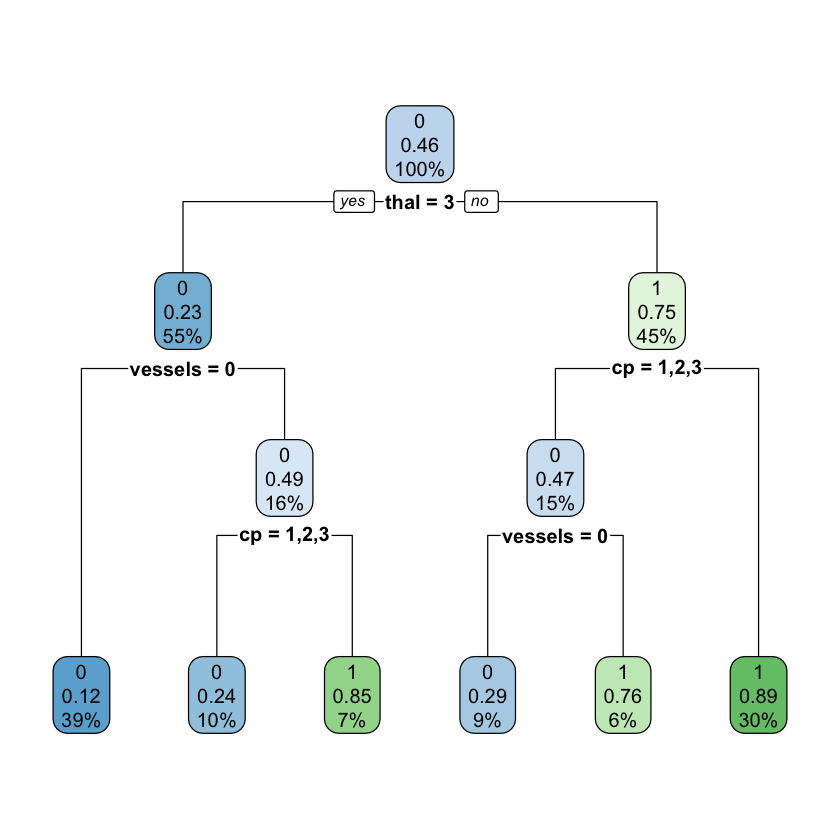

In [39]:
rpart.plot(tree.data1)

<p>This plot is a little more visually appealing and also reinforces our graphical findings of <code>cp</code>. Each time the chest pain variable is included as <code>cp = 1,2,3</code>, meaning chest pain is 1,2 or 3, the resulting </code>no</code> classification finds the heart disease classification as 1, indicating a likelihood of heart disease.</p>

<p>It is also apparent that a <code>thal</code> classification of 3, or normal, is incredibly important in the branching path since it is at the top.</p>

If we recreate this tree with a low <code>cp</code> value, which will create a deeper tree, we can try pruning to see if we get any better results.

In [40]:
tree.data2 <- rpart(hd~., data = hd_dataimp1[,c(-14,-16)], method = "class", cp = 0.00001)

In [41]:
summary(tree.data2)

Call:
rpart(formula = hd ~ ., data = hd_dataimp1[, c(-14, -16)], method = "class", 
    cp = 1e-05)
  n= 303 

           CP nsplit rel error    xerror       xstd
1 0.482014388      0 1.0000000 1.0000000 0.06240124
2 0.050359712      1 0.5179856 0.6402878 0.05703820
3 0.043165468      3 0.4172662 0.5179856 0.05330109
4 0.007194245      5 0.3309353 0.4316547 0.04990484
5 0.000010000      8 0.3093525 0.4676259 0.05140544

Variable importance
    thal       cp   Max_HR  oldpeak    exang  vessels      sex trestbps 
      24       19       12       10       10        9        6        4 
   slope     chol      age  restECG 
       2        2        1        1 

Node number 1: 303 observations,    complexity param=0.4820144
  predicted class=0  expected loss=0.4587459  P(node) =1
    class counts:   164   139
   probabilities: 0.541 0.459 
  left son=2 (168 obs) right son=3 (135 obs)
  Primary splits:
      thal    splits as  LRR,       improve=40.78505, (0 missing)
      cp      splits as  

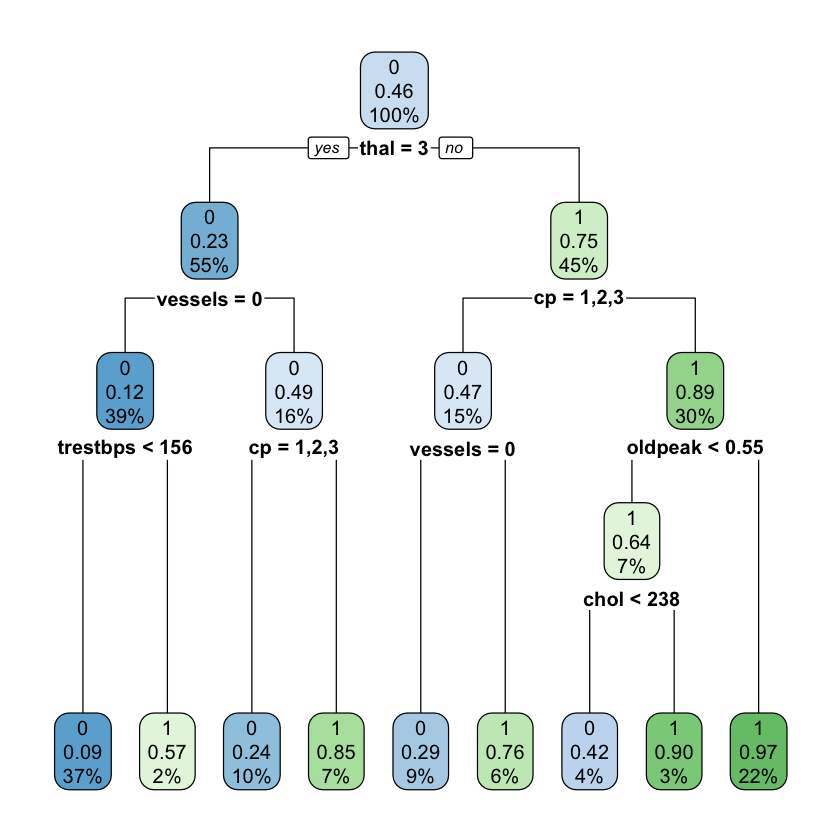

In [42]:
rpart.plot(tree.data2)

Now we will print and plot the <code>cp</code> values from this model to try and find the one that minimizes the X-val error

In [44]:
printcp(tree.data2)


Classification tree:
rpart(formula = hd ~ ., data = hd_dataimp1[, c(-14, -16)], method = "class", 
    cp = 1e-05)

Variables actually used in tree construction:
[1] chol     cp       oldpeak  thal     trestbps vessels 

Root node error: 139/303 = 0.45875

n= 303 

         CP nsplit rel error  xerror     xstd
1 0.4820144      0   1.00000 1.00000 0.062401
2 0.0503597      1   0.51799 0.64029 0.057038
3 0.0431655      3   0.41727 0.51799 0.053301
4 0.0071942      5   0.33094 0.43165 0.049905
5 0.0000100      8   0.30935 0.46763 0.051405


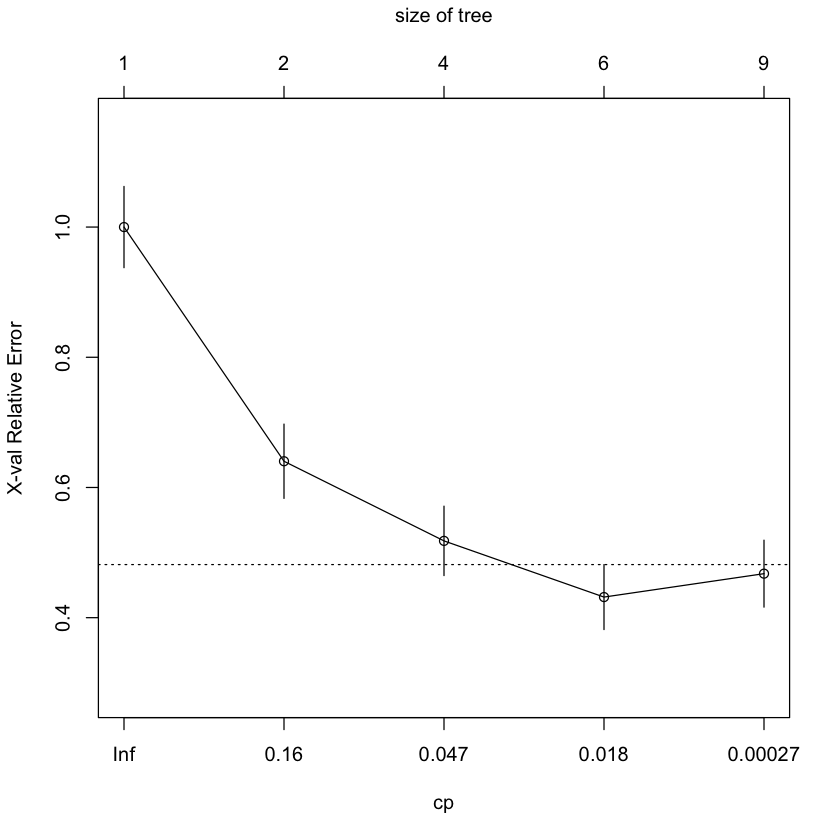

In [43]:
plotcp(tree.data2)

In [45]:
bestcp <- tree.data2$cptable[which.min(tree.data2$cptable[,"xerror"]),"CP"]
bestcp
tree.pruned <- prune(tree.data2, cp = bestcp)

[1] 0.007194245

As we are plotting the newly pruned tree, we will add some more parameters to better describe the findings.

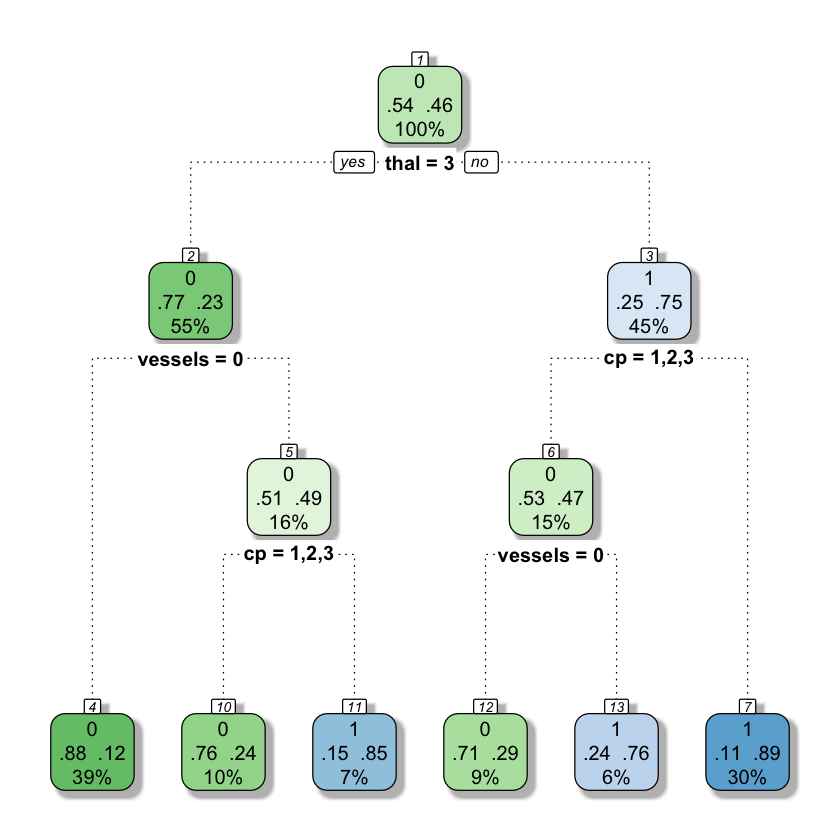

In [46]:
rpart.plot(tree.pruned, extra=104, box.palette="GnBu",
               branch.lty=3, shadow.col="gray", nn=TRUE)

Now lets create a confusion matrix to test the predictions of each tree model.

In [60]:
conf.matrix <- round((table(hd_dataimp1$hd, predict(tree.data, type="class"))), 2)
rownames(conf.matrix) <- c("Actual hd", "Actual no")
colnames(conf.matrix) <- c("Predicted hd", "Predicted no")
conf.matrix

           
            Predicted hd Predicted no
  Actual hd          153           11
  Actual no           28          111

In [61]:
conf.matrix1 <- round((table(hd_dataimp1$hd, predict(tree.data1, type="class"))), 2)
rownames(conf.matrix1) <- c("Actual hd", "Actual no")
colnames(conf.matrix1) <- c("Predicted hd", "Predicted no")
conf.matrix1

           
            Predicted hd Predicted no
  Actual hd          147           17
  Actual no           29          110

In [62]:
conf.matrix2 <- round((table(hd_dataimp1$hd, predict(tree.data2, type="class"))), 2)
rownames(conf.matrix2) <- c("Actual hd", "Actual no")
colnames(conf.matrix2) <- c("Predicted hd", "Predicted no")
conf.matrix2

           
            Predicted hd Predicted no
  Actual hd          151           13
  Actual no           30          109

Surprisingly, the first tree model we used in the <code>tree</code> package performed the best with 39 misclassifications an accuracy of 0.87. Second place went to the pruned tree from <code>rpart</code> with 43 misclassifications and an accuracy of 0.85.

## Random Forest Model

We will now build a random forest model and split the data into test and train sets

In [63]:
data <- hd_dataimp1[,c(-14,-16)]

inTrain <- sample(1:nrow(data), 0.7 * nrow(data))
train.set <- data[inTrain,]
test.set <- data[-inTrain,]

In [64]:
r <- randomForest(hd~., data = train.set, importance = TRUE, ntree = 500)
print(r)
summary(r)




Call:
 randomForest(formula = hd ~ ., data = train.set, importance = TRUE,      ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 19.81%
Confusion matrix:
   0  1 class.error
0 95 19   0.1666667
1 23 75   0.2346939


                Length Class  Mode     
call               5   -none- call     
type               1   -none- character
predicted        212   factor numeric  
err.rate        1500   -none- numeric  
confusion          6   -none- numeric  
votes            424   matrix numeric  
oob.times        212   -none- numeric  
classes            2   -none- character
importance        52   -none- numeric  
importanceSD      39   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                212   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [65]:
predictions <- predict(r, test.set)
table(test.set$hd, predictions)

   predictions
     0  1
  0 48  2
  1 10 31

This random forest model receives a high accuracy of 0.86

Now we will use the <code>e1071</code> package to tune the parameters of our model to see if we can optimize our results

In [70]:
tuned.r <- tune(randomForest, train.x = hd~.,
                data = train.set,
                validation.x = test.set)

best.model <- tuned.r$best.model
predictions <- predict(best.model, test.set)
table.random.forest <- table(test.set$hd, predictions)
table.random.forest

accuracy <- sum(diag(as.matrix(table.random.forest))) / sum(table.random.forest)
accuracy

   predictions
     0  1
  0 48  2
  1 10 31

[1] 0.8681319

This performs similarly as the base random forest model.

## Logistic Regression Model

In [81]:
log_model <- glm(data = train.set, formula = hd~., family = "binomial")
summary(log_model)


Call:
glm(formula = hd ~ ., family = "binomial", data = train.set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9208  -0.5184  -0.1487   0.4261   2.7528  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.107e+00  3.201e+00  -1.283 0.199491    
age         -4.017e-02  2.857e-02  -1.406 0.159730    
sexMale      1.421e+00  6.367e-01   2.231 0.025650 *  
cp2          1.691e+00  9.480e-01   1.784 0.074432 .  
cp3          4.223e-01  8.127e-01   0.520 0.603299    
cp4          2.189e+00  8.099e-01   2.702 0.006884 ** 
trestbps     2.634e-02  1.334e-02   1.974 0.048354 *  
chol         5.254e-03  5.105e-03   1.029 0.303366    
fbs1        -4.829e-01  6.949e-01  -0.695 0.487051    
restECG1     1.285e+01  1.020e+03   0.013 0.989945    
restECG2     9.288e-02  4.506e-01   0.206 0.836674    
Max_HR      -2.457e-02  1.282e-02  -1.917 0.055262 .  
exang1       4.718e-01  5.085e-01   0.928 0.353561    
oldpeak      3.241e-01  2.670e-01

Since the predictions of a logistic model will be probabilities, we must come up with a threshold value to classify each point as 1/0. We will make a new variable, called <code>pred_hd</code> that accomplishes this task. We will use 0.5 as a starting point.

In [89]:
pred_prob <- predict(log_model, test.set, type = "response")
test.set$pred_hd <- ifelse(pred_prob >= 0.5, 1, 0)


Using the <code>Metrics</code> package, we can calculate the AUC, accuracy, and classification error for this model.

In [91]:
library(Metrics)

auc <- auc(test.set$hd, test.set$pred_hd)
accuracy <- accuracy(test.set$hd, test.set$pred_hd)
classification_error <- ce(test.set$hd, test.set$pred_hd)

print(paste("AUC=", auc))
print(paste("Accuracy=", accuracy))
print(paste("Classification Error=", classification_error))

table(test.set$hd,test.set$pred_hd, dnn=c("True Status","Predicted Status"))

[1] "AUC= 0.835853658536585"
[1] "Accuracy= 0.846153846153846"
[1] "Classification Error= 0.153846153846154"


           Predicted Status
True Status  0  1
          0 47  3
          1 11 30

This performs slightly worse than the random forest model but still achieves an accuracy of over 80%

If we have a slightly less strict threshold at 0.7, we will have the following results.

In [96]:
pred_prob <- predict(log_model, test.set, type = "response")
test.set$pred_hd <- ifelse(pred_prob >= 0.7, 1, 0)

In [97]:
auc <- auc(test.set$hd, test.set$pred_hd)
accuracy <- accuracy(test.set$hd, test.set$pred_hd)
classification_error <- ce(test.set$hd, test.set$pred_hd)

print(paste("AUC=", auc))
print(paste("Accuracy=", accuracy))
print(paste("Classification Error=", classification_error))

table(test.set$hd,test.set$pred_hd, dnn=c("True Status","Predicted Status"))

[1] "AUC= 0.797073170731707"
[1] "Accuracy= 0.813186813186813"
[1] "Classification Error= 0.186813186813187"


           Predicted Status
True Status  0  1
          0 48  2
          1 15 26

We receive an even lower accuracy score.

Using a strict threshold of 0.3, we received the following

In [98]:
pred_prob <- predict(log_model, test.set, type = "response")
test.set$pred_hd <- ifelse(pred_prob >= 0.3, 1, 0)

In [99]:
auc <- auc(test.set$hd, test.set$pred_hd)
accuracy <- accuracy(test.set$hd, test.set$pred_hd)
classification_error <- ce(test.set$hd, test.set$pred_hd)

print(paste("AUC=", auc))
print(paste("Accuracy=", accuracy))
print(paste("Classification Error=", classification_error))

table(test.set$hd,test.set$pred_hd, dnn=c("True Status","Predicted Status"))

[1] "AUC= 0.891219512195122"
[1] "Accuracy= 0.89010989010989"
[1] "Classification Error= 0.10989010989011"


           Predicted Status
True Status  0  1
          0 44  6
          1  4 37

Surprisingly, the more strict threshold gives the highest prediction accuracy.